### Analysis:

Within a single python notebook **analysis.ipynb**, add the following:

(g) Use your script to generate two simulations: one for $e=0.01671$ and one for $e=0.25$ (which is Pluto's eccentricity) for $T=5$ and RK2. What would happen if Earth would have the eccentrity of Pluto? It may be helpful to compare the orbital history for both values of $e$ in a single plot.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from PIL import Image


In [2]:
#Run simulation for T = 5 years e = 0.01671 using RK2 
!python kepler.py -im -g -RK 2 -T 5 -e 0.01671 

In [3]:
#Run simulation for T = 5 years e = 0.25 using RK2
!python kepler.py -im -g -RK 2 -T 5 -e 0.25

In [4]:
def comparison_maps(i, x1_values, y1_values, vx1_values, vy1_values, x2_values, y2_values, vx2_values, vy2_values, t_values):
    
    fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(10,12))
    ax1.set_title('time [years] = %.3f' %t_values[i] , size = 20)
    
    ax1.plot(x1_values[i], y1_values[i], 'bo', markersize=10, label='$e=0.25$')    # Earth
    ax1.plot(x2_values[i], y2_values[i], 'ro', markersize=10, label='$e=0.01671$')    # Earth
        
    ax1.plot(0, 0, 'yo', c='y', markersize=15, label='$ r_{Sun} $')          # Sun

    ax1.plot(x1_values[:i], y1_values[:i], linestyle=':', c='b', linewidth=0.5)          # Sun
    ax1.plot(x2_values[:i], y2_values[:i], linestyle=':', color='r', linewidth=0.5)          # Sun

    ax1.tick_params(axis='both', which='major', labelsize=14, width=2, length=7)

    ax1.set_xlabel('$x [AU]$', size=15)
    ax1.set_ylabel('$y [AU]$', size=15)

    ax1.set_xlim([-1.7, 1.7])
    ax1.set_ylim([-1.7, 1.7])

    ax1.legend(fontsize=16)
    ax1.grid()

        
        
    ax2.plot(vx1_values[i], vy1_values[i], 'bo', markersize=10, label='$e=0.25$')
    ax2.plot(vx2_values[i], vy2_values[i], 'ro', markersize=10, label='$e=0.01671$')

    ax2.plot(0, 0, 'yo', c='y', markersize=15, label='$v_{Sun}$')          # Sun

    ax2.plot(vx1_values[:i], vy1_values[:i], linestyle=':', c='b', linewidth=0.5)          # Sun
    ax2.plot(vx2_values[:i], vy2_values[:i], linestyle=':', c='r', linewidth=0.5)          # Sun

    ax2.tick_params(axis='both', which='major', labelsize=14, width=2, length=7)

    ax2.set_xlabel('$v_x [AU/years]$', size=15)
    ax2.set_ylabel('$v_y [AU/years]$', size=15)

    ax2.set_xlim([-9, 10])
    ax2.set_ylim([-9, 10])

    ax2.legend(fontsize=16)
    ax2.grid()

    if not os.path.exists("./outputfolder/comparison_e_orbits_images"):
        os.makedirs("./outputfolder/comparison_e_orbits_images")
    plt.savefig("./outputfolder/comparison_e_orbits_images/orbit{:03d}.png".format(i))

    plt.close()

In [5]:
#Import data

data_ecc_0_25 = np.loadtxt("./outputfolder/Period_5-ecc_0.25-t_step_0.01/history.txt", skiprows=1)

t_values = data_ecc_0_25[:, 0]

x_values_1 = data_ecc_0_25[:, 1]
y_values_1 = data_ecc_0_25[:, 2]
vx_values_1 = data_ecc_0_25[:, 3]
vy_values_1 = data_ecc_0_25[:, 4]

data_ecc_0_01671 = np.loadtxt("./outputfolder/Period_5-ecc_0.01671-t_step_0.01/history.txt", skiprows=1)

x_values_2 = data_ecc_0_01671[:, 1]
y_values_2 = data_ecc_0_01671[:, 2]
vx_values_2 = data_ecc_0_01671[:, 3]
vy_values_2 = data_ecc_0_01671[:, 4]




In [6]:
# Create images 
for i in range(len(t_values)):
    if i%5 == 0:
        comparison_maps(i, x_values_1, y_values_1, vx_values_1, vy_values_1,x_values_2, y_values_2, vx_values_1, vy_values_2, t_values)

    

In [7]:
images_in = "./outputfolder/comparison_e_orbits_images/orbit****.png"

gif_image_out = "./outputfolder/compared_orbtits.gif"

imgs = (Image.open(f) for f in sorted(glob.glob(images_in)))

img = next(imgs)

img.save(fp = gif_image_out, format='GIF', append_images=imgs, save_all=True, duration=100, loop=0)


As we can see in the gif animation called compared_orbtits.gif in the output folder, when we change the eccentricity, the orbit deviates from the circle form and becomes more elliptical. We notice that the perihelion will be closer to the Sun while the aphelion will be farther. 

For the velocity, if Earth had the eccentricity of Pluto, its speed would vary depending on its distance from the Sun. When Earth is closest to the Sun (at perihelion), it moves faster than at standard conditions, while at aphelion, it moves slower.

(h) Use your script to measure the convergence of RK3 for $e=0.01671$ by integrating at a number of different time steps. To analyse convergence, you need to define some measure for the error, e.g., you can consider the change in radius after one period (i.e., at $T=1$). Thus, you should add additional functions for this to your code in **kepler.py**. **Note:** Please include your own simulations in the **outputfolder** for a reference.

We are going to conisder the absolute error in the change of the radius after one period for the steps sizes 0.001 0.01 and 0.5

In [8]:
#Run simulation for T = 1 years e = 0.01671 using RK3 and time steps of 0.001
!python kepler.py -RK 3 -T 1 -e 0.01671 -k 0.001




In [9]:
#Run simulation for T = 1 years e = 0.01671 using RK3 and time steps of 0.01
!python kepler.py -RK 3 -T 1 -e 0.01671 -k 0.01



In [10]:
#Run simulation for T = 1 years e = 0.01671 using RK3 and time steps of 0.05
!python kepler.py -RK 3 -T 1 -e 0.01671 -k 0.05



In [11]:
#Extract the data of the previous simulations
data_ts_0_001 = np.loadtxt("./outputfolder/Period_1-ecc_0.01671-t_step_0.001/history.txt", skiprows=1)
data_ts_0_01 = np.loadtxt("./outputfolder/Period_1-ecc_0.01671-t_step_0.01/history.txt", skiprows=1)
data_ts_0_05 = np.loadtxt("./outputfolder/Period_1-ecc_0.01671-t_step_0.05/history.txt", skiprows=1)

#Extract the initial radius
r_0 = [data_ts_0_001[0, 1], data_ts_0_001[0, 2]]
radius_0 = np.sqrt(r_0[0]**2 + r_0[1]**2)

#Extract the radius after one period for step_sizes of 0.001
r_ts_0_001 = [data_ts_0_001[-1, 1], data_ts_0_001[-1, 2]]
radius_ts_0_001 = np.sqrt(r_ts_0_001[0]**2 + r_ts_0_001[1]**2)

#Extract the radius after one period for step_sizes of 0.01
r_ts_0_01 = [data_ts_0_01[-1, 1], data_ts_0_01[-1, 2]]
radius_ts_0_01 = np.sqrt(r_ts_0_01[0]**2 + r_ts_0_01[1]**2)

#Extract the radius after one period for step_sizes of 0.01
r_ts_0_05 = [data_ts_0_05[-1, 1], data_ts_0_05[-1, 2]]
radius_ts_0_05 = np.sqrt(r_ts_0_05[0]**2 + r_ts_0_05[1]**2)


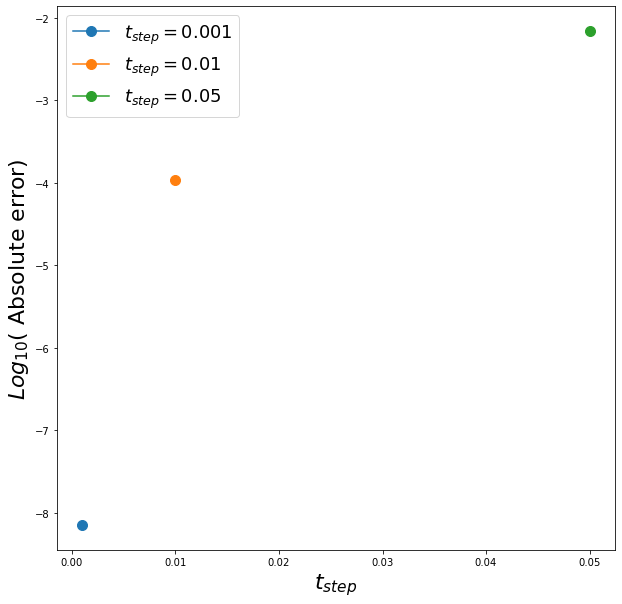

In [12]:
#Plotting 

plt.figure(figsize=(10,10))

plt.plot(0.001, np.log10(abs(radius_ts_0_001 - radius_0)) , "-o", markersize=10, label = "$t_{step} = 0.001$")
plt.plot(0.01, np.log10(abs(radius_ts_0_01 - radius_0)) , "-o", markersize=10, label = "$t_{step} = 0.01$")
plt.plot(0.05, np.log10(abs(radius_ts_0_05 - radius_0)) , "-o", markersize=10, label = "$t_{step} = 0.05$")

plt.xlabel('$t_{step}$', size=22)
plt.ylabel('$Log_{10}$( Absolute error)', size=22)


plt.legend(fontsize=18)
plt.show()


As we expected, when we decrease the step sizes in the RK3 method we get more accuracy as it is clear in the plot. That is the error between the true radius and the numerical radius decreases. For example for step sizes of $k=0.001$ the error is of the order of $10^{-9}$ $[AU]$  as it is expected since the error must behave as $O(h^{3})$  (third-order). 
